### Goal

- Understand your cleaned dataset (Cleaned_Solar_Data.csv) before training — detect trends, correlations, and data quality issues.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
df = pd.read_csv("./Data Sets/Cleaned_Solar_Data.csv")
print(df.shape)
df.head()


(68845, 10)


,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,HOUR,MONTH
0,2020-05-15 06:00:00,41.857143,4.028571,0.0,7177992.0,24.088446,22.206757,0.005887,6,5
1,2020-05-15 06:00:00,57.000000,5.500000,0.0,6339380.0,24.088446,22.206757,0.005887,6,5
2,2020-05-15 06:00:00,54.625000,5.275000,0.0,7007866.0,24.088446,22.206757,0.005887,6,5
3,2020-05-15 06:00:00,54.625000,5.275000,0.0,6782598.0,24.088446,22.206757,0.005887,6,5
4,2020-05-15 06:00:00,38.625000,3.737500,0.0,7038681.0,24.088446,22.206757,0.005887,6,5


In [2]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68845 entries, 0 to 68844
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            68845 non-null  object 
 1   DC_POWER             68845 non-null  float64
 2   AC_POWER             68845 non-null  float64
 3   DAILY_YIELD          68845 non-null  float64
 4   TOTAL_YIELD          68845 non-null  float64
 5   AMBIENT_TEMPERATURE  68845 non-null  float64
 6   MODULE_TEMPERATURE   68845 non-null  float64
 7   IRRADIATION          68845 non-null  float64
 8   HOUR                 68845 non-null  int64  
 9   MONTH                68845 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.3+ MB
None
           DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD  \
count  68845.000000  68845.000000  68845.000000  6.884500e+04   
mean    3386.523263    544.718709   3368.070728  3.090388e+08   
std     3859.649029    373.47

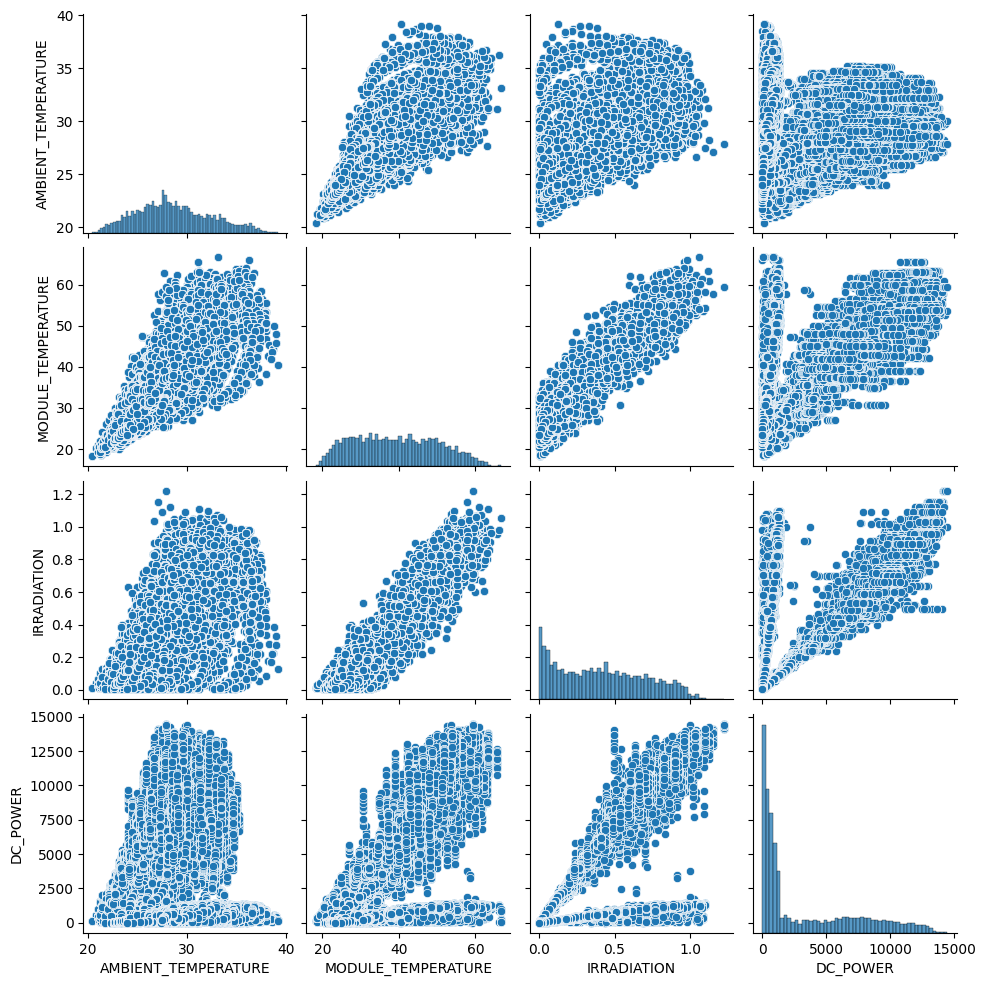

In [3]:
sns.pairplot(df[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'DC_POWER']])
plt.show()


C:\Users\peerm\AppData\Local\Temp\ipykernel_11960\3738571285.py:10: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\peerm\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


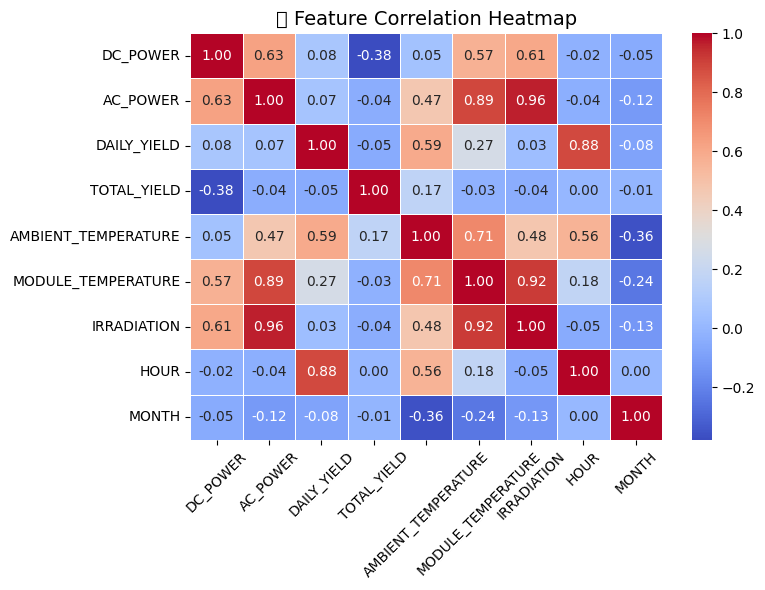

In [5]:
# Compute correlation matrix (numeric columns only)
corr = df.select_dtypes(include='number').corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("🔗 Feature Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

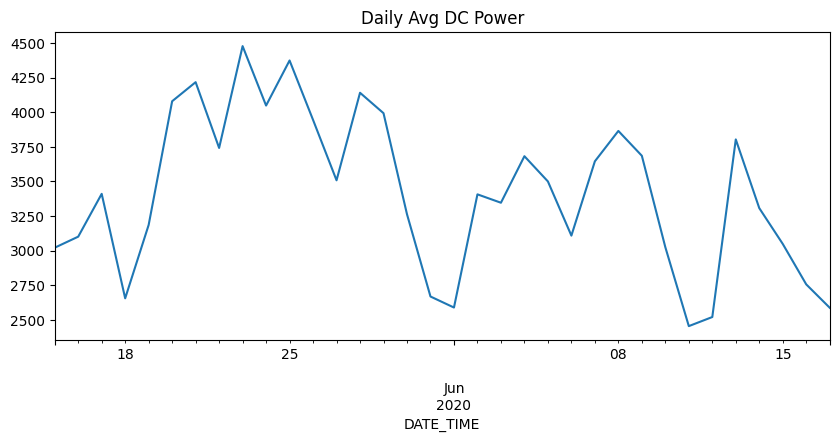

In [6]:
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])
df.set_index('DATE_TIME', inplace=True)

df['DC_POWER'].resample('D').mean().plot(figsize=(10,4), title="Daily Avg DC Power")
plt.show()


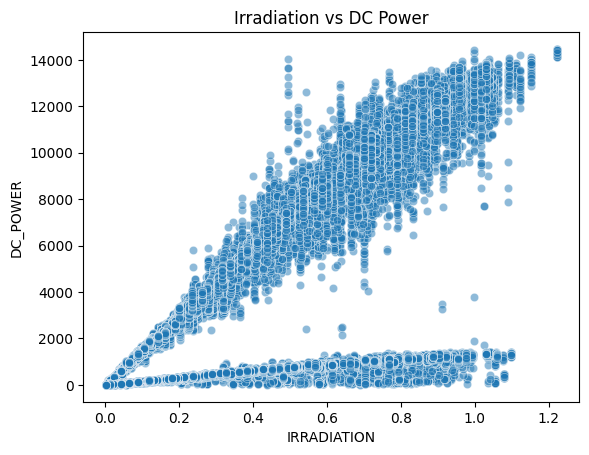

In [7]:
sns.scatterplot(x='IRRADIATION', y='DC_POWER', data=df, alpha=0.5)
plt.title("Irradiation vs DC Power")
plt.show()


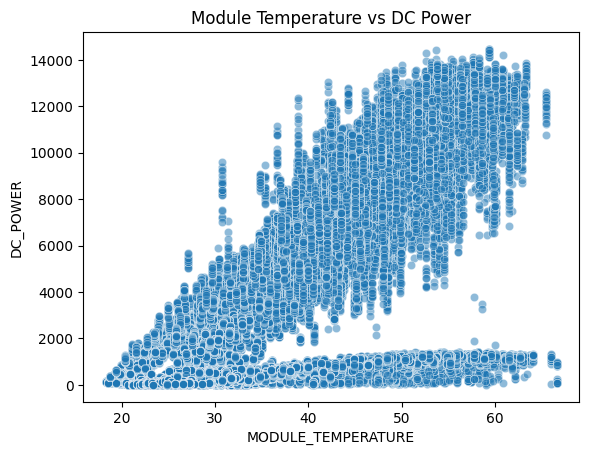

In [8]:
sns.scatterplot(x='MODULE_TEMPERATURE', y='DC_POWER', data=df, alpha=0.5)
plt.title("Module Temperature vs DC Power")
plt.show()
